In [7]:
import os
import sys
import re
import pickle
import random
import subprocess
import time
import threading
import shutil
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor, wait, ALL_COMPLETED
from datetime import datetime, timedelta
from multiprocessing import Process, Pool

# import numpy as np
# import pandas as pd
# import anndata as ad
# import h5py
# # import Bio
# # from Bio import motifs
# import pysam
# # import pyranges
# import pybedtools
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import seaborn as sns
# import sklearn
# from sklearn import preprocessing

# import scipy as sp
# import scanpy as sc
# from sklearn.cluster import KMeans
# from adjustText import adjust_text
# import episcanpy

# import SCRIPT

In [18]:
path='../../indices/mouse/ChIP_top10k'
for i in os.listdir(path):
    if i.endswith('bed.gz'):
        os.system('mv {src} {out}'.format(src=path+'/'+i, out=path+'/'+i.split("_")[0]+'_'+i.split("_")[1].capitalize()))

In [138]:
plt.rcParams.update({
    'font.size' : 15,
    'figure.figsize': [8.0, 8.0],
    'font.style' : 'normal',
    'font.weight':'bold',
    'figure.titleweight': 'bold',
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'axes.spines.right': False,
    'axes.spines.top': False,
})

In [2]:
tmp = sc.read_h5ad('/mnt/Storage/home/tangke/brain.h5ad')

In [33]:
input_mat = sc.read_10x_h5('/mnt/Storage/home/tangke/maestro_peak_count.h5', gex_only=False)

In [34]:
input_mat

AnnData object with n_obs × n_vars = 3243 × 86374
    var: 'gene_ids', 'feature_types', 'genome'

In [28]:
coor_table = pd.DataFrame(tmp.obsm['X_umap'],index = tmp.obs.index, columns=['X','Y'])

In [23]:
from SCRIPT.enrichment import bed_generation

In [132]:
cells = bed_generation.find_nearest_cells(cell='GCCCTCATCTAAGGTC_1', coor_table=coor_table, n_neighbor=30, step=None )

In [133]:
cell_above_cutoff_index = sc.pp.filter_genes(input_mat[cells,:], min_cells=3, inplace=False)[0]

In [134]:
peaks = input_mat.var_names[cell_above_cutoff_index].to_list()

In [135]:
peaks.__len__()

102

In [137]:
res = sc.read_h5ad('/mnt/Storage/home/tangke/second_try/enrichment/SCRIPT_enrichment.h5ad')

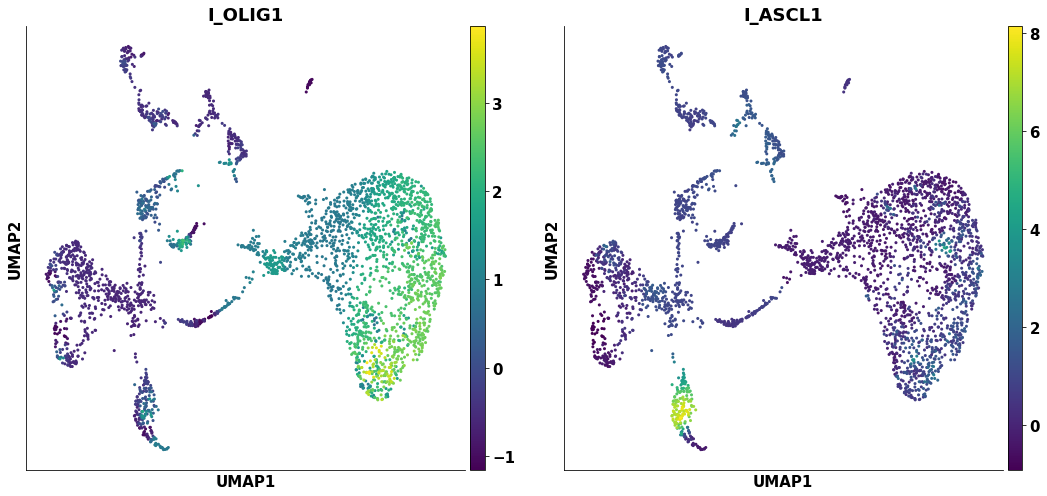

In [149]:
sc.pl.umap(res, color=['I_OLIG1','I_ASCL1'])

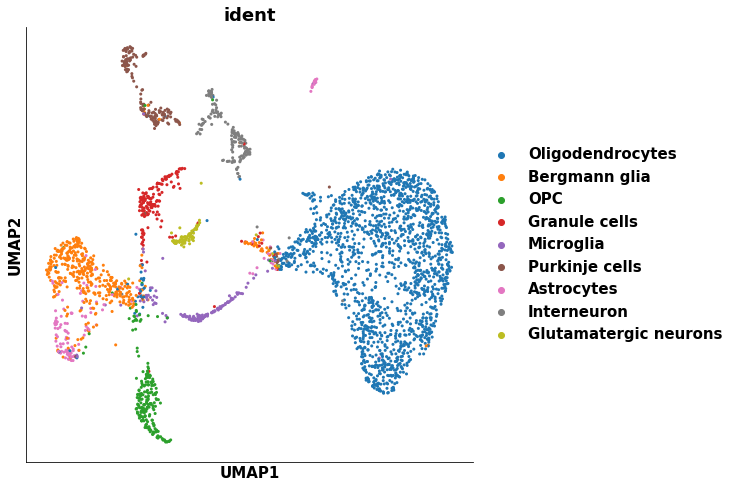

In [141]:
sc.pl.umap(res, color='ident')

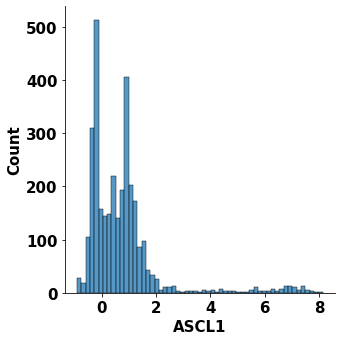

In [150]:
sns.displot(res.uns['ChIP_z']['ASCL1'])

In [152]:
sudo_expression_SCRIPT = ad.AnnData(res.uns['ChIP_z'])

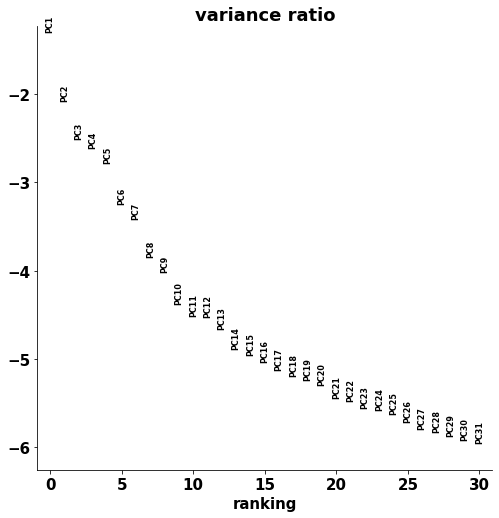

/mnt/Storage/home/dongxin/Applications/miniconda3/envs/test/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [153]:
sc.tl.pca(sudo_expression_SCRIPT, svd_solver='arpack')
sc.pl.pca_variance_ratio(sudo_expression_SCRIPT, log=True)
sc.pp.neighbors(sudo_expression_SCRIPT, n_neighbors=10, n_pcs=40)
sc.tl.umap(sudo_expression_SCRIPT)
sc.tl.louvain(sudo_expression_SCRIPT)

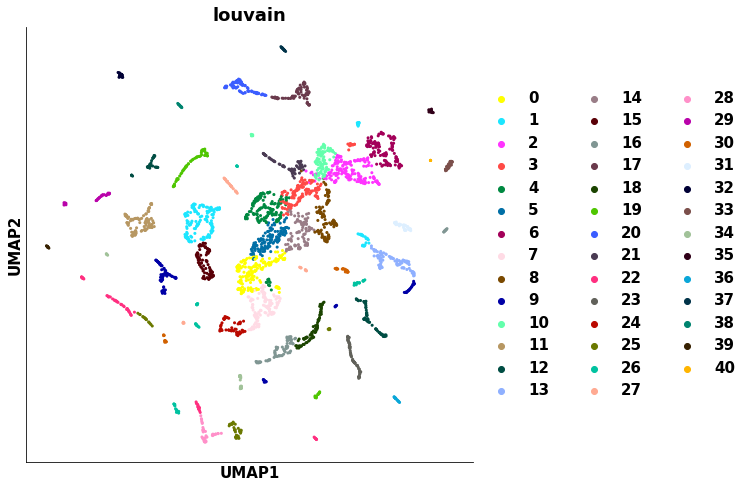

In [154]:
sc.pl.umap(sudo_expression_SCRIPT, color=['louvain'])